In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
cust_data=pd.read_csv('Telco-Customer-Churn.csv')
cust_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
cust_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA


### Preprocessing

In [5]:
cust_data.drop('customerID',axis=1,inplace=True)

In [6]:
cust_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
cust_data['TotalCharges'][:13]

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
Name: TotalCharges, dtype: object

<Axes: >

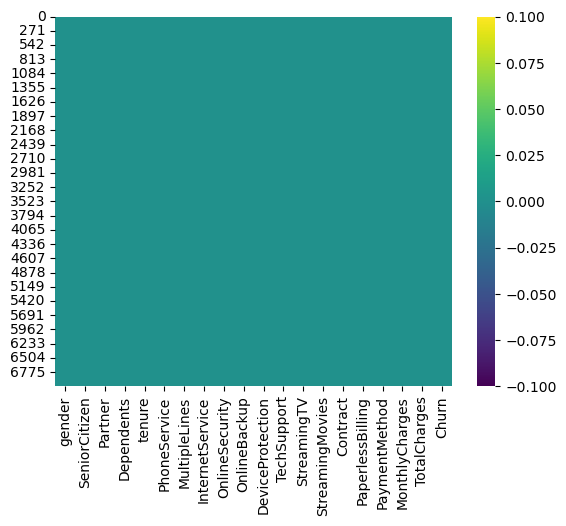

In [8]:
sns.heatmap(cust_data.isnull(),cmap='viridis') #so null values

In [9]:
cust_data_1=cust_data[cust_data['TotalCharges'] !=" "] #dropping empty values

In [10]:
cust_data_1=cust_data[cust_data['TotalCharges'] !=" "]

In [11]:
cust_data_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
cust_data_1.info()   #some values have object data type,so do hot-encoding convert them to float

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [13]:
def uniq_col_val(cust_data_1):
    for column in cust_data_1:
        if cust_data_1[column].dtypes=='object':
            print(f'{column}:{cust_data_1[column].unique()}')

In [14]:
uniq_col_val(cust_data_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [15]:
#ust_data_1['InternetService'].unique()

In [16]:
cust_data_1.replace('No phone service','No',inplace=True)
cust_data_1.replace('No internet service','No',inplace=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13996\2237593058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data_1.replace('No phone service','No',inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13996\2237593058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data_1.replace('No internet service','No',inplace=True)


In [17]:
uniq_col_val(cust_data_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [18]:
#converting yes no to 1,0
yes_no_columns=[['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']]

In [19]:
for col in cust_data_1[['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']]:
    cust_data_1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13996\1001365855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data_1[col].replace({'Yes':1,'No':0},inplace=True)


In [22]:
for col in cust_data_1:
    print(col, " :",cust_data_1[col].unique())

gender  : ['Female' 'Male']
SeniorCitizen  : [0 1]
Partner  : [1 0]
Dependents  : [0 1]
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : [0 1]
MultipleLines  : [0 1]
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : [0 1]
OnlineBackup  : [1 0]
DeviceProtection  : [0 1]
TechSupport  : [0 1]
StreamingTV  : [0 1]
StreamingMovies  : [0 1]
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : [1 0]
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : [0 1]


In [25]:
cust_data_1['gender'].replace({'Female':0,'Male':1},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13996\3527971899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_data_1['gender'].replace({'Female':0,'Male':1},inplace=True)


In [26]:
for col in cust_data_1:
    print(col, " :",cust_data_1[col].unique())

gender  : [0 1]
SeniorCitizen  : [0 1]
Partner  : [1 0]
Dependents  : [0 1]
tenure  : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  : [0 1]
MultipleLines  : [0 1]
InternetService  : ['DSL' 'Fiber optic' 'No']
OnlineSecurity  : [0 1]
OnlineBackup  : [1 0]
DeviceProtection  : [0 1]
TechSupport  : [0 1]
StreamingTV  : [0 1]
StreamingMovies  : [0 1]
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : [1 0]
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges  : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  : [0 1]


In [77]:
#NOW  InternetService,Contract,PaymentMethod  ARE REMAINING
cust_data_2=pd.get_dummies(cust_data_1,columns=['InternetService','Contract','PaymentMethod'])
cust_data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [78]:
#Almost preprocessed
cust_data_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [82]:
cust_data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [83]:
import pandas as pd

# Assuming columns col1, col2, ..., col9 are the columns containing True and False
columns_to_convert = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','PaymentMethod_Mailed check']

# Convert True and False to 1 and 0 in the specified columns
cust_data_2[columns_to_convert] = cust_data_2[columns_to_convert].astype(int)


In [84]:
cust_data_2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# Visualizing Data pattrens

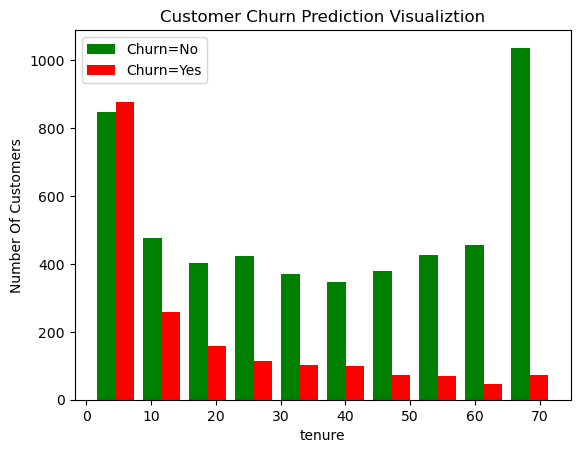

In [36]:
tenure_churn_no = cust_data_2[cust_data_2.Churn==0]['tenure']
tenure_churn_yes = cust_data_2[cust_data_2.Churn==1]['tenure']
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()

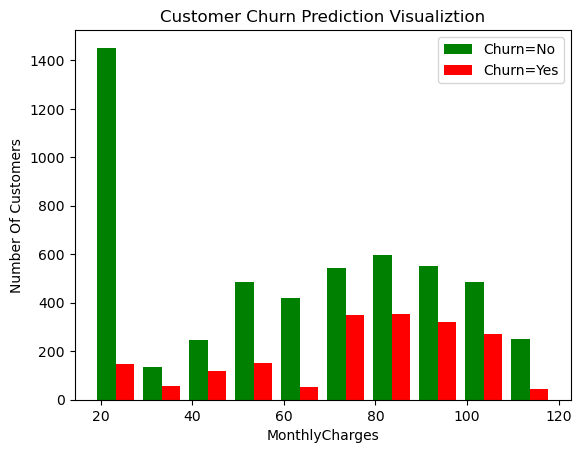

In [37]:
m_churn_no = cust_data_2[cust_data_2.Churn==0]['MonthlyCharges']
m_churn_yes = cust_data_2[cust_data_2.Churn==1]['MonthlyCharges']
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([m_churn_no,m_churn_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()

# Now training model

In [85]:
#Normalizing values 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cust_data_2[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(cust_data_2[['tenure','MonthlyCharges','TotalCharges']])


In [86]:
X = cust_data_2.drop('Churn',axis='columns')
y = cust_data_2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [87]:
X_train[:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,0,0,1,1,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1730,1,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4086,0,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
2259,0,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [41]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [45]:
y_train.shape

(5625,)

In [47]:
y_test.shape

(1407,)

In [88]:
X_train[:4]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


## ANN (Artificial neural network ) using Tensorflow / Keras 

In [89]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential(
[
    keras.layers.Dense(26,input_shape=(26,),activation='relu'), #input
    keras.layers.Dense(15,activation='relu'), #hidden neural,
    keras.layers.Dense(1,activation='sigmoid') #output,
]
)
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',    
        metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


176/176 [==============================] - 1s 2ms/step - loss: 0.5166 - accuracy: 0.7420
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.7956
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8085
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4045 - accu

176/176 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8304
Epoch 77/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8292
Epoch 78/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8336
Epoch 79/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3576 - accuracy: 0.8318
Epoch 80/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8327
Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8325
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8286
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 0.8340
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8324
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 

In [95]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7768


[0.4901779294013977, 0.7768301367759705]

In [96]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [97]:
yp[:4]

array([[3.1100392e-01],
       [7.0665687e-01],
       [8.1101584e-04],
       [8.6385143e-01]], dtype=float32)

In [99]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [102]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [104]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 5664 to 2920
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5625 non-null   int64  
 1   SeniorCitizen                            5625 non-null   int64  
 2   Partner                                  5625 non-null   int64  
 3   Dependents                               5625 non-null   int64  
 4   tenure                                   5625 non-null   float64
 5   PhoneService                             5625 non-null   int64  
 6   MultipleLines                            5625 non-null   int64  
 7   OnlineSecurity                           5625 non-null   int64  
 8   OnlineBackup                             5625 non-null   int64  
 9   DeviceProtection                         5625 non-null   int64  
 10  TechSupport                              5625 non-

In [105]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       999
           1       0.63      0.56      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

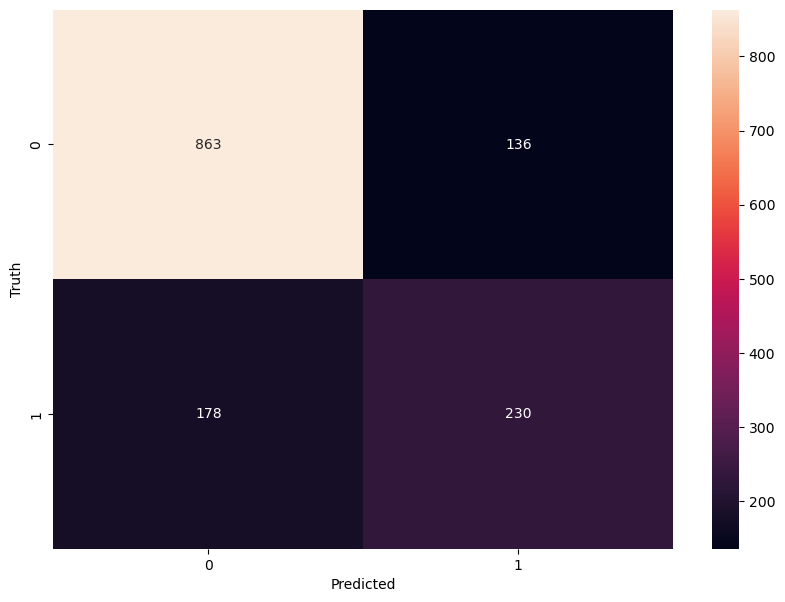

In [106]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')